In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA of Carvana Data

In [146]:
carvana = pd.read_csv('datasets/carvana_cleaned.csv')
pd.set_option('display.max_columns', None)
carvana.head()

,url,id,make,model,price,year,type,status,mileage,trim,scraped_at,address,city,state,zip,mpg_city,mpg_hwy,cylinders_count,engine,horsepower,torque,fuel_type,drivetrain,color,transmission,doors,seats,vin,stock_number,curb_weight,msrp,displacement
0,https://www.carvana.com/vehicle/2004050,2004050,Nissan,Sentra,18990,2017,Sedan,Available,27633,S Sedan 4D,2021-10-09 13:10:07,14450 West Rd,Houston,TX,77041,27.0,37.0,4.0,"4-Cyl, 1.8 Liter",NaN,NaN,Gas,FWD,Silver,"Auto, CVT w/Xtronic",4,5,3N1AB7AP2HY321285,2001283529,2857,18975,NaN
1,https://www.carvana.com/vehicle/1834140,1834140,Nissan,Altima,17590,2015,Sedan,Available,55648,2.5 SV Sedan 4D,2021-10-09 13:10:10,1951 Morgan Rd,Bessemer,AL,35022,27.0,38.0,4.0,"4-Cyl, 2.5 Liter",NaN,NaN,Gas,FWD,Black,"Automatic, Xtronic CVT",4,5,1N4AL3AP6FC104658,2001064426,3206,25555,NaN
2,https://www.carvana.com/vehicle/2027280,2027280,Volkswagen,Jetta,19590,2019,Sedan,Available,43649,1.4T S Sedan 4D,2021-10-09 13:10:11,63 Pierce Rd,Winder,GA,30680,30.0,40.0,4.0,"4-Cyl, Turbo, 1.4 Liter",NaN,NaN,Gas,FWD,White,"Automatic, 8-Spd & Tiptronic",4,5,3VWC57BU8KM127308,2001316091,2970,20240,1.4
3,https://www.carvana.com/vehicle/1834450,1834450,Nissan,Versa,16590,2019,Sedan,Available,31887,S Sedan 4D,2021-10-09 13:11:19,1123 Cantrell Sansom Rd,Blue Mound,TX,76131,27.0,36.0,4.0,"4-Cyl, 1.6 Liter",109.0,107.0,Gas,FWD,Black,"Manual, 5-Spd",4,5,3N1CN7AP5KL822420,2001053561,2395,13385,1.6
4,https://www.carvana.com/vehicle/2004398,2004398,Chevrolet,Cruze,18590,2018,Sedan,Available,19363,LS Sedan 4D,2021-10-09 13:11:21,1925 Concord Pkwy S,Concord,NC,28027,29.0,40.0,4.0,"4-Cyl, Turbo, 1.4 Liter",153.0,177.0,Gas,FWD,Silver,"Automatic, 6-Spd",4,5,1G1BC5SM7J7198252,2001287434,0,21995,1.4


In [147]:
carvana.shape

(329, 32)

# Analysis

I am sharing the belief that every dataset is cleansed and prepared for _something_, some purpose. 
Using this dataset, I will try to answer some questions about Carvana data, namely:

- what affects the price of a car the most (my guess it's the year, we will see)
- which brand ("make") has the highest depreciation rate, and which has the lowest (I assume that would be German and Japaneese cars respectively)
- what brand has the biggest average engine displacement (some American car brand for sure)
- what car brand is the most often occuring in this dataset (hard to say)
- does a transmission type affects a price of a car (there is a belief that no one can drive stickshift, therefore they go for cheap)
- is there a relationship between drivetrain and a body style (for example, if it's FWD, that's most likely a sedan, RWD is either a truck or a coupe)
- what is the most common color of the car (gotta be black)
- what is the cheapest and the most expensive car in this dataset for each brand
- which car brand has the highest average horsepower (American, likely)
- which car brand and model has the highest MPG (most likely Japanese)

# Correlation matrix & heatmap

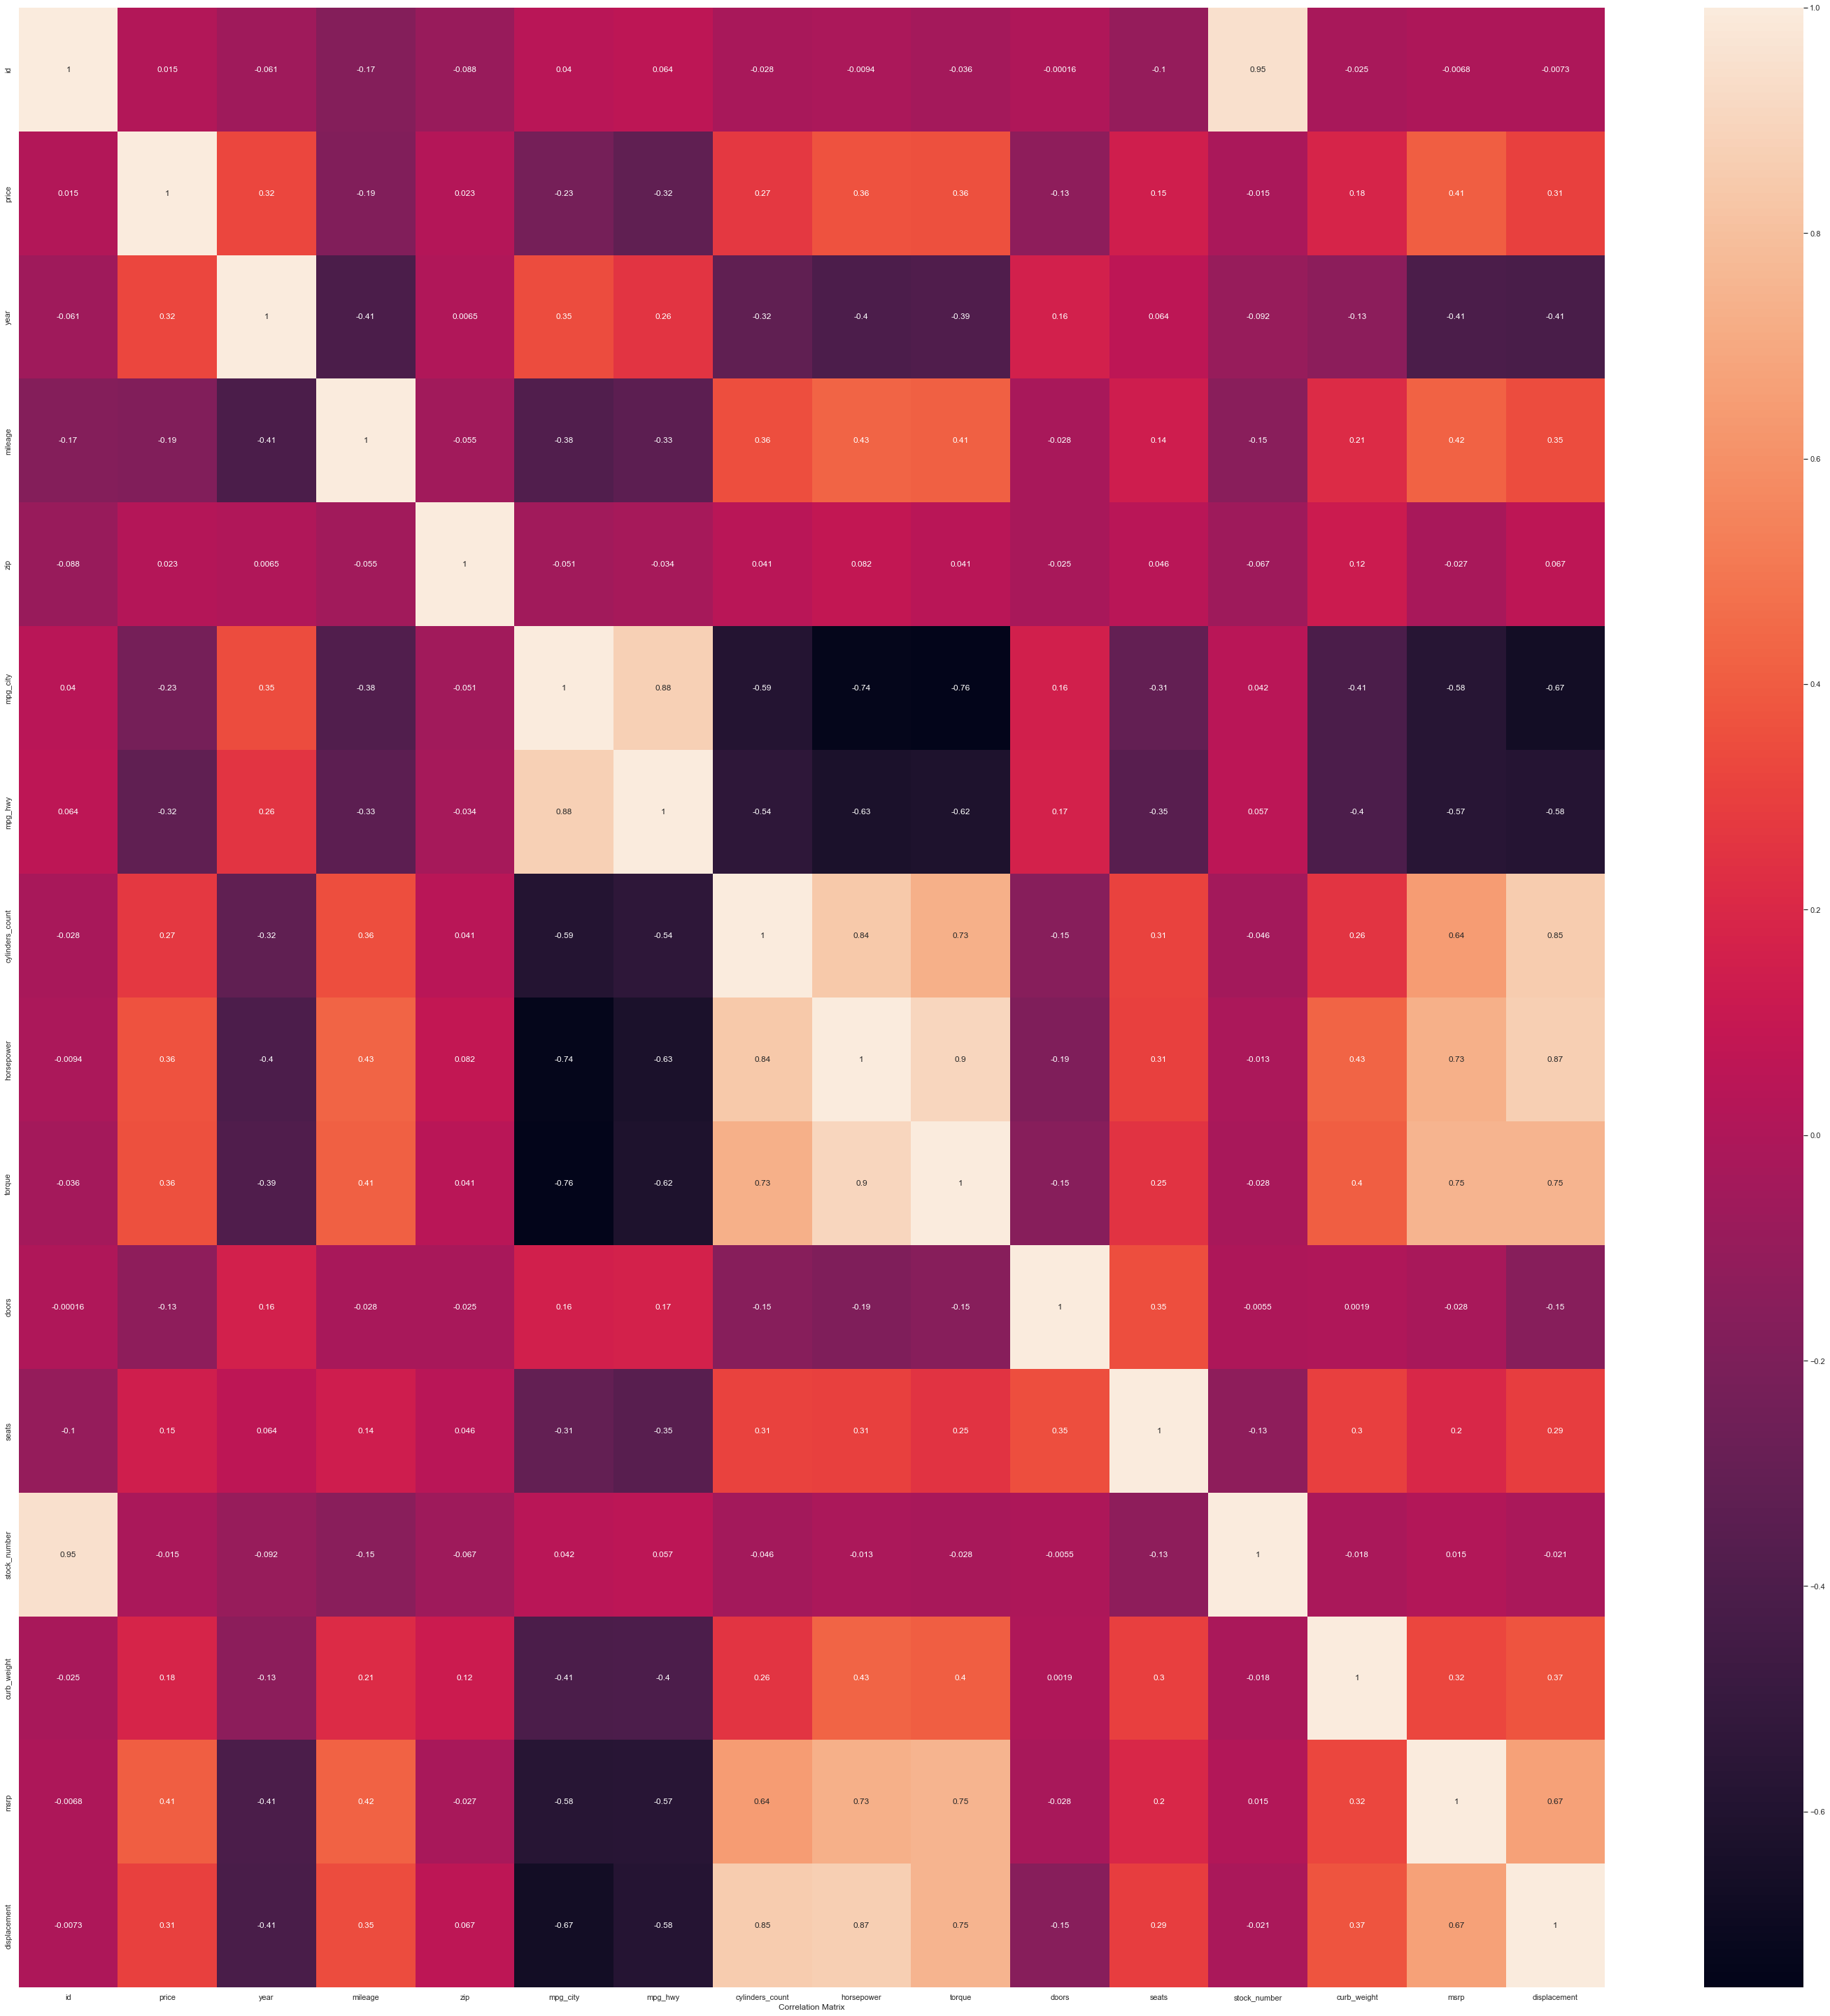

In [148]:
sns.heatmap(carvana.corr(), annot =True )
sns.set(rc = {'figure.figsize':(40,40)})
plt.tight_layout()
plt.xlabel('Correlation Matrix')
plt.show()

<u>**Linear**</u> correlations (negative or positive):
- stock number & ID (makes sense, they have to be somehow related)
- displacement & City MPG. The more displacement, the less is City MPG
- torque & City MPG. The more the torque, the less is City MPG
- cylinders count & City MPG, the more the cylinders count, the less it the City MPG
- horsepower & City MPG, the more the horsepower, the less is City MPG
- horsepower, torque, displacement, and cylinder count have similar relationship to Hwy MPG.

- horsepower affects msrp strongly positively (0.73), while it doesn't affect the price that strong (0.36). **Do high-HP cars depreciate fast?** 
- curb weight has some weak effect on MPG (-0.4). The heavier the car, the less is the MPG.
- year has some weak effect on mileage (-0.4). The newer the car, the lesser is the mileage.
- mileage has very weak effect on price (-0.19). More miles affects the car price, but not as strong as year or horsepower.

### Limitations:

Pearson's Correlation Coefficient shows only how strong one parameter related to another linearly. In other words, if the relationship is not linear (for example, U-shaped), it might not be representing this relationship well. 

Therefore, to better see the relationships, I will use a seaborn.pairplot.

Before doing so, I would reduce the number of numerical columns since a lot of them are tightly related and would contaminate the graph
(speaking of **torque**-**horsepower**-**displacement**)

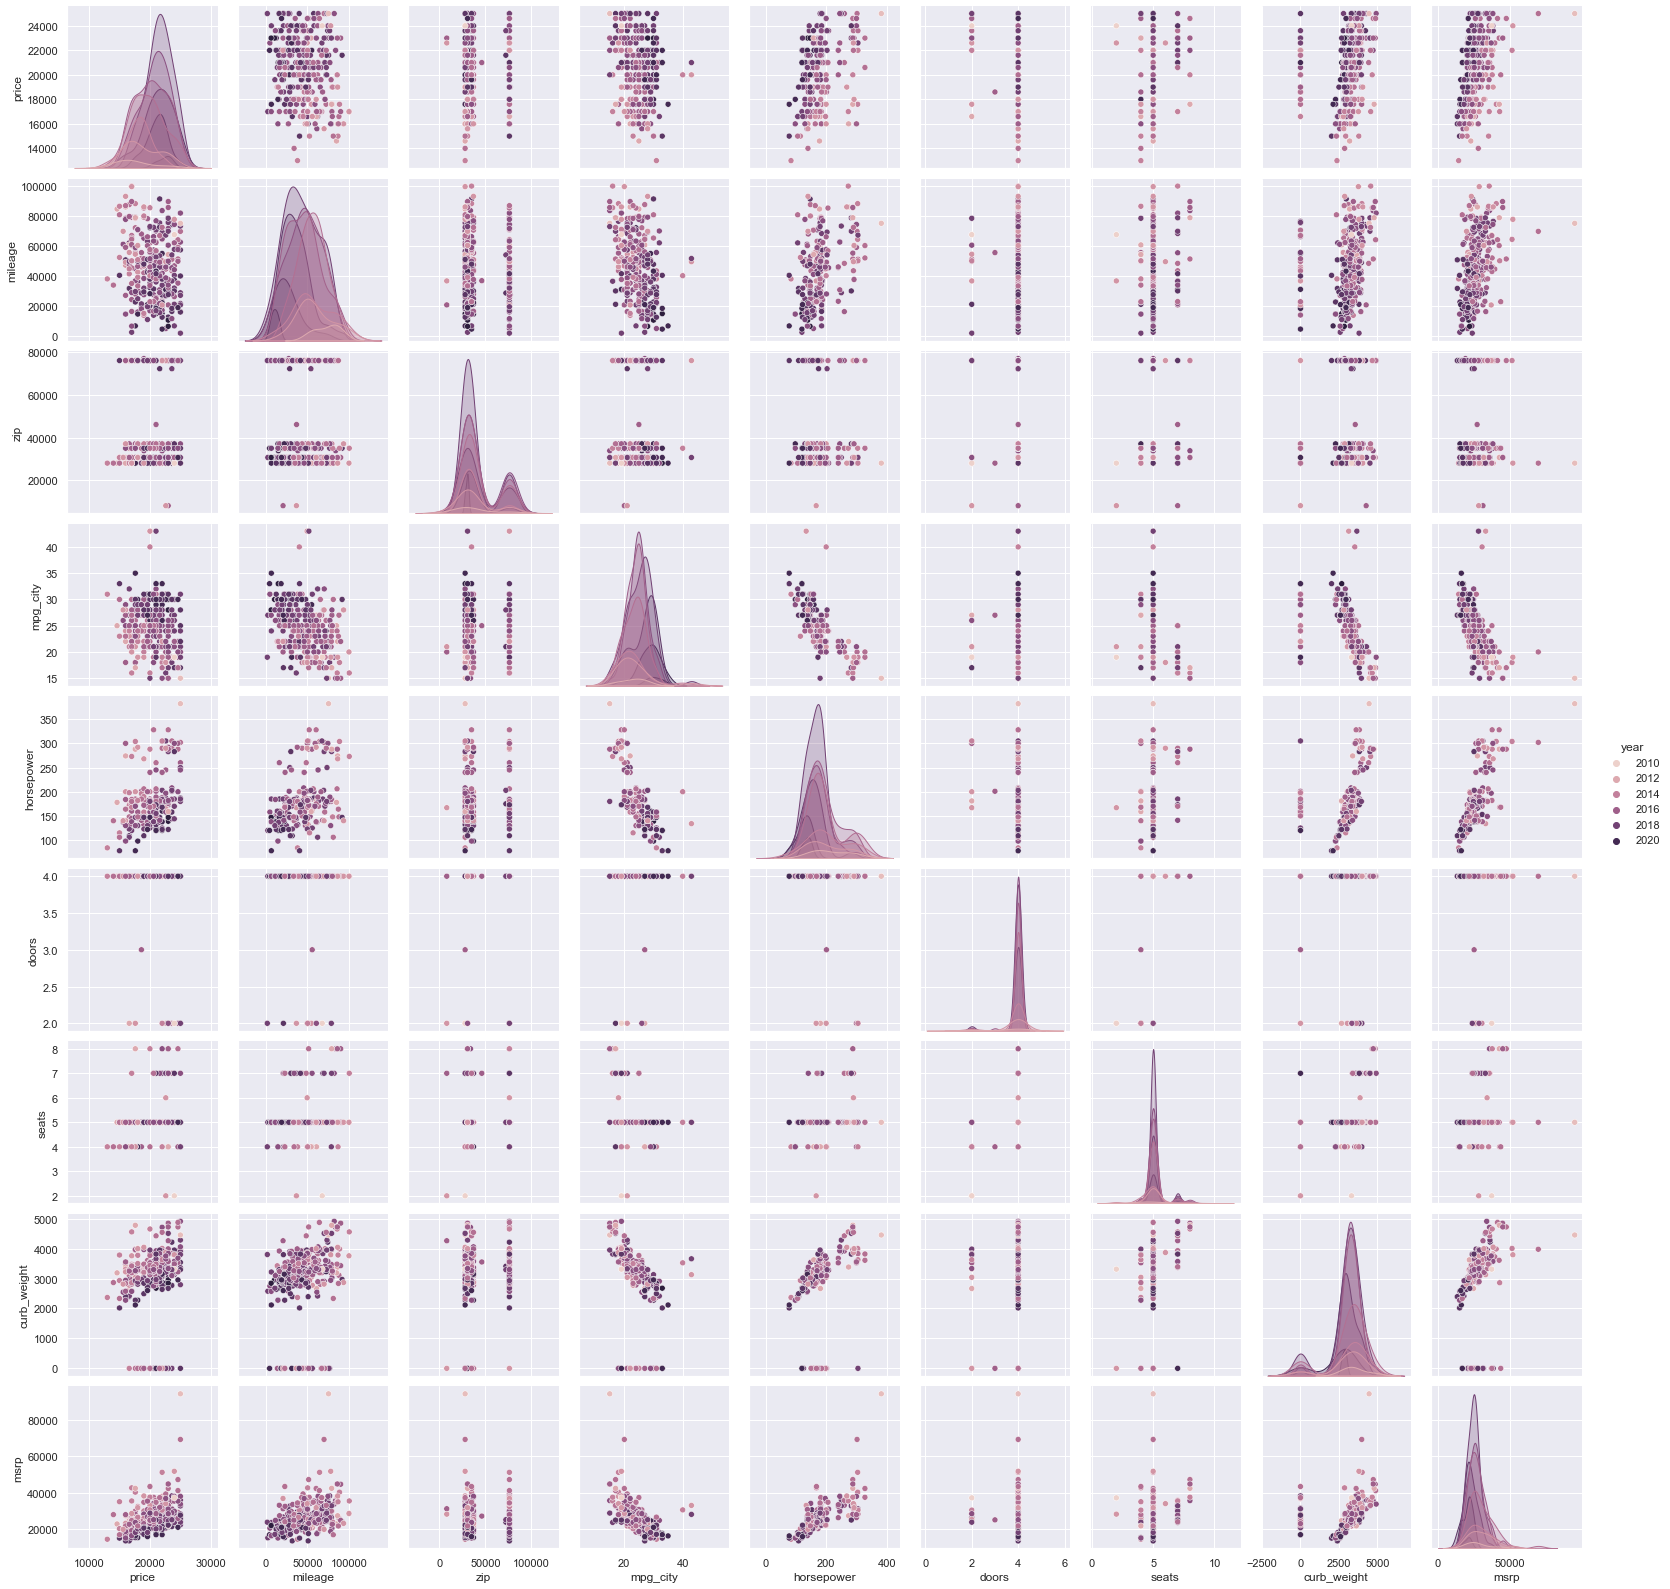

In [149]:
carvana_reduced = carvana.drop(['mpg_hwy', 'cylinders_count', 'torque', 'displacement', 'id', 'stock_number'], axis=1)

sns.pairplot(carvana_reduced, hue='year')

There are some conclusions to be made from this plot:

- **seems like more recent cars have lesser average curb weight?**
- mileage alone indeed has no visible relationship with price (wow!)
- MPG has a very clear linear relationship with curb weight
- **seems like cars made in 2016-2018 have the highest average mileage?**
- price is somewhat affected by the horsepower

# What affects the price of a car?

Based on acquired data, those are all linear correlations between columns sorted from positive to negative:

In [150]:
carvana.corr()['price'].sort_values(ascending=False)

price              1.000000
msrp               0.405682
horsepower         0.362221
torque             0.361491
year               0.321102
displacement       0.305637
cylinders_count    0.268525
curb_weight        0.180684
seats              0.146227
zip                0.022705
id                 0.015417
stock_number      -0.015312
doors             -0.131636
mileage           -0.185601
mpg_city          -0.228736
mpg_hwy           -0.318230
Name: price, dtype: float64

However, this output needs to be slightly modified. 

We don't need **price**, since correlation with itself will always be 1.

**id** and **stock_number** are useless (they also show no correlation whatsoever, which is expectable)

Lastly, we are interest what contributes to the price the most, and not the sign of this correlation.

Therefore:


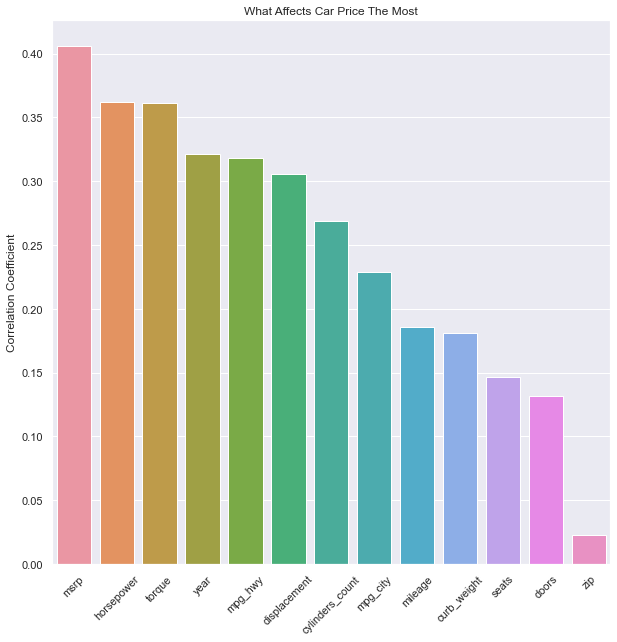

In [151]:
price_affect = abs(carvana.corr()['price']).sort_values(ascending=False)

price_affect = pd.DataFrame(price_affect).transpose()
price_affect.drop(['price', 'id', 'stock_number'], axis=1, inplace=True)

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.barplot(data=price_affect)
ax.set_xticklabels(price_affect.columns, rotation = 45)
ax.set_title("What Affects Car Price The Most")
ax.set_ylabel('Correlation Coefficient')
plt.show()

### Conclusions:
- the most affecting factor is **MSRP**. The more expensive the car from the factory, the more expensive after it will be
- surprisingly, second & third place belong to **horsepower** and **torque**. People _love_ gaz guzzlers and are ready to pay more for them!
- next goes the **year**, followed by **gas mileage on a highway**. Give me the horsepower, but make it efficient
- an odometer reading, **mileage**, is on the 9th place. I have a hypothesis that mileage has more effect on same-year cars, but might not be as important for the price across the board

### Limitations:

- there are other factors that greatly affect the cost of the car. For example, mechanical/electrical problems with this particular year/model can drop the price significantly, if the car is notorius for breaking down on the go. Type of terrain and road condition matters (FWD and AWD cars would be predominant somewhere in Alaska, whilst convertibles are typically sell well in Florida and California). Parts availablilty takes its toll as well. 

# Depreciation Rate Analysis

First of all, let's determine Depreciation. 

Depreciation is a loss of an asset's value over time, can be described by:

$$Future Value = Initial Value \times (1 + \frac{r}{100})^n $$

where _r_ is annual depreciation rate in %, and _n_ is a number of years.

I will use current car price as a _Future_ _Value_, and MSRP as an _Initial_ _Value_, in order to get the depreciation rate r:

$$r=(\sqrt[n]{\tfrac{Future Value}{Initial Value}} -  1) \times 100$$

In [152]:
# Feature Engineering: calculating Depreciation Rate column:
carvana['depreciation_rate'] = 100*((carvana.price/carvana.msrp)**(1/(2021-carvana.year)) - 1)
carvana.head()

,url,id,make,model,price,year,type,status,mileage,trim,scraped_at,address,city,state,zip,mpg_city,mpg_hwy,cylinders_count,engine,horsepower,torque,fuel_type,drivetrain,color,transmission,doors,seats,vin,stock_number,curb_weight,msrp,displacement,depreciation_rate
0,https://www.carvana.com/vehicle/2004050,2004050,Nissan,Sentra,18990,2017,Sedan,Available,27633,S Sedan 4D,2021-10-09 13:10:07,14450 West Rd,Houston,TX,77041,27.0,37.0,4.0,"4-Cyl, 1.8 Liter",NaN,NaN,Gas,FWD,Silver,"Auto, CVT w/Xtronic",4,5,3N1AB7AP2HY321285,2001283529,2857,18975,NaN,0.019757
1,https://www.carvana.com/vehicle/1834140,1834140,Nissan,Altima,17590,2015,Sedan,Available,55648,2.5 SV Sedan 4D,2021-10-09 13:10:10,1951 Morgan Rd,Bessemer,AL,35022,27.0,38.0,4.0,"4-Cyl, 2.5 Liter",NaN,NaN,Gas,FWD,Black,"Automatic, Xtronic CVT",4,5,1N4AL3AP6FC104658,2001064426,3206,25555,NaN,-6.035244
2,https://www.carvana.com/vehicle/2027280,2027280,Volkswagen,Jetta,19590,2019,Sedan,Available,43649,1.4T S Sedan 4D,2021-10-09 13:10:11,63 Pierce Rd,Winder,GA,30680,30.0,40.0,4.0,"4-Cyl, Turbo, 1.4 Liter",NaN,NaN,Gas,FWD,White,"Automatic, 8-Spd & Tiptronic",4,5,3VWC57BU8KM127308,2001316091,2970,20240,1.4,-1.618834
3,https://www.carvana.com/vehicle/1834450,1834450,Nissan,Versa,16590,2019,Sedan,Available,31887,S Sedan 4D,2021-10-09 13:11:19,1123 Cantrell Sansom Rd,Blue Mound,TX,76131,27.0,36.0,4.0,"4-Cyl, 1.6 Liter",109.0,107.0,Gas,FWD,Black,"Manual, 5-Spd",4,5,3N1CN7AP5KL822420,2001053561,2395,13385,1.6,11.330460
4,https://www.carvana.com/vehicle/2004398,2004398,Chevrolet,Cruze,18590,2018,Sedan,Available,19363,LS Sedan 4D,2021-10-09 13:11:21,1925 Concord Pkwy S,Concord,NC,28027,29.0,40.0,4.0,"4-Cyl, Turbo, 1.4 Liter",153.0,177.0,Gas,FWD,Silver,"Automatic, 6-Spd",4,5,1G1BC5SM7J7198252,2001287434,0,21995,1.4,-5.452117


A lot of interesting things can be noticed in this newly calculated field. Some depreciation coefficients came out positive, how so? 

Car shortage of 2021 is the answer. The car model was so demanded that it was sold above the MSRP 2 years after.

There is another issue:

In [153]:
carvana[carvana.depreciation_rate == np.inf]

,url,id,make,model,price,year,type,status,mileage,trim,scraped_at,address,city,state,zip,mpg_city,mpg_hwy,cylinders_count,engine,horsepower,torque,fuel_type,drivetrain,color,transmission,doors,seats,vin,stock_number,curb_weight,msrp,displacement,depreciation_rate
52,https://www.carvana.com/vehicle/2027788,2027788,Hyundai,Accent,20990,2021,Sedan,Available,15036,SE Sedan 4D,2021-10-09 13:15:26,1925 Concord Pkwy S,Concord,NC,28027,33.0,41.0,4.0,"4-Cyl, 1.6 Liter",120.0,113.0,Gas,FWD,Black,"Automatic, IVT w/Shiftronic",4,5,3KPC24A67ME138620,2001289694,2679,17490,1.6,inf
56,https://www.carvana.com/vehicle/1994643,1994643,Toyota,Corolla,22990,2021,Sedan,Available,10702,LE Sedan 4D,2021-10-09 13:15:37,63 Pierce Rd,Winder,GA,30680,30.0,38.0,4.0,"4-Cyl, 1.8 Liter",139.0,126.0,Gas,FWD,Black,"Automatic, CVT",4,5,JTDEPMAE8MJ164437,2001270541,2955,21230,1.8,inf
212,https://www.carvana.com/vehicle/2032346,2032346,Kia,Soul,22990,2021,Wagon,Available,6569,S Wagon 4D,2021-10-09 13:29:19,63 Pierce Rd,Winder,GA,30680,28.0,33.0,4.0,"4-Cyl, 2.0 Liter",147.0,132.0,Gas,FWD,Red,"Automatic, i-VT",4,5,KNDJ23AU1M7777365,2001312803,2844,21865,2.0,inf


Depreciation rate of this car is infinity, and it happens if the car is made in 2021. 

2021-2021 is 0, 1/0 is undefined, but in a limit for denominator going to 0, the whole fraction is going to infinity. 

that's where the infinity comes form. Let's just get rid of those rows:

In [154]:
#Dropping rows in infinite values
depreciation = carvana.drop([carvana.index[52], carvana.index[56], carvana.index[212]])

# Groupby 'make', disp average
depreciation_list = depreciation.groupby(['make'])['depreciation_rate'].mean().sort_values(ascending=False)
depreciation_list

make
Kia              -0.809118
Mitsubishi       -0.991996
Toyota           -1.232257
Honda            -1.520212
Scion            -1.632485
Nissan           -1.789616
Subaru           -2.570929
Hyundai          -2.674911
Mazda            -3.161561
Volkswagen       -4.627316
Chevrolet        -5.894124
Mini             -5.900459
Dodge            -5.913079
Ford             -5.964724
Lincoln          -6.233614
Acura            -6.360531
Jeep             -6.996778
Chrysler         -7.099635
Lexus            -7.615918
Infiniti         -8.077640
Audi             -8.163777
Buick            -8.319116
Gmc              -8.985638
Bmw             -10.772949
Cadillac        -11.380622
Mercedes-benz   -14.051579
Name: depreciation_rate, dtype: float64

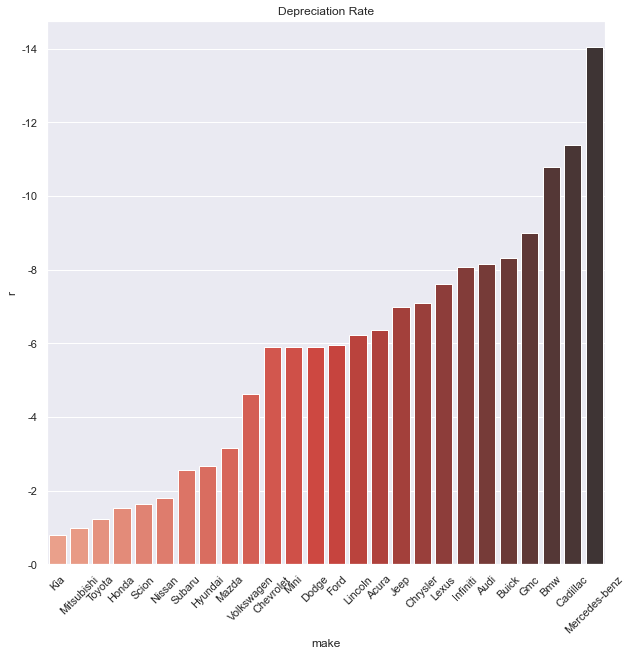

In [155]:
# you may need to rerun this cell twice since sometimes the graph does not display properly
depreciation_list = abs(pd.DataFrame(depreciation_list).transpose())

# plotting the graph
fig_d, ax_d = plt.subplots(figsize=(10, 10))
ax_d = sns.barplot(data=depreciation_list, palette="Reds_d")
ax_d.set_xticklabels(depreciation_list.columns, rotation = 45)
ax_d.set_title("Depreciation Rate")
ax_d.yaxis.set_major_formatter('-{x:1.0f}')
ax_d.set_ylabel('r')

plt.show()



This graph shows depreciation in car brands, from the slowest to the fastest depreciation rates.

What's interesting is Kia showing as the least depreciating car brand. Does it mean Kia is the most reliable car, beating Toyotas and Nissans? 

Not quite. While I don't personally have anything against Kias and Korean automotive industry, the Carvana dataset is relatively small. Alonside with that, Depreciation Rate is determined for each model. Usually, one car manufacturer will have models that built to last and therefore holding there value, and some will have poor engineering resulting into various problems, so their price will plummet soon after initial sale. I calculated the average, meaning we took the good and the bad. Because the dataset is only around ~300 rows, could it be possible we merely don't have many 'bad' models for Kia? 

Let's check what kind of Kias are in there:



In [156]:
carvana[carvana.make=='Kia']['model'].value_counts()

Forte       9
Optima      8
Soul        6
Rio         4
Sorento     3
Forte5      2
Sportage    2
Name: model, dtype: int64

Kia Forte, Forte5, Sorento and Soul are considered best Kia models, while Rio considered one of the worst. 
But there are only 4 Kia Rio, and many more quality Kia cars, therefore the depreciation rate tend to be higher per group compared to mean of depreciation rate for all models individually.
Lastly, the population size for each brand is quite small. Is it possible these Kias are scratched up less than other brands? Very possibly.

The rest of the graph is believable. Japanese cars (Toyota, Honda, Nissan) occupy the beginning, while luxury cars occupy the back (BMW, Cadillac, Mercedes). What causes such a big difference?

- parts availablilty. Easy to get Japanese parts or locally made aftermarket replacement, German are often do not have aftermarket copies and have to be shipped from the overseas
- amount of electronics and complex nodes that can break. If it's a luxury car, every amenity inside tend to have a computer to better adapt to the owner. As we know, the more complex is a device, the more elements in it can possibly break over time. Old luxury cars are often not even fully fixed. 
- complexity of repair. German engineers do not want parking lot mechanics to service their cars, therefore simple routine repairs can cost a lot and can only be completed with professional tools, while Japanese cars generally require nothing like that. 

### Horsepower and depreciation

The hypothesis that high-hp cars are abused and therefore depreciate faster appeared somewhere above, let's test it as the final experiment with depreciation, but before we do that, we need to define what is High HP car? Let's see the span of horsepowers we have: 

In [157]:
carvana.horsepower.sort_values(ascending=False).unique()

array([382., 328., 305., 304., 302., 300., 292., 290., 288., 283., 274.,
       273., 268., 260., 250., 245., 240., 208., 206., 203., 201., 200.,
       198., 197., 196., 190., 189., 188., 187., 185., 184., 182., 181.,
       180., 179., 178., 176., 175., 173., 172., 170., 168., 167., 166.,
       164., 160., 159., 158., 155., 153., 152., 150., 149., 148., 147.,
       145., 144., 141., 140., 139., 138., 137., 134., 132., 130., 125.,
       124., 123., 122., 120., 115., 109., 106.,  98.,  84.,  78.,  nan])

Average car has around 180 hp. Let's say everything that >= 250 hp is a _high_ _HP_ car. To compare their depreciation rate, we need to mark high-powered cars from others. In order to do that, let's define a column 'is_highhp_car', where 'Yes' will mean it is a high HP car. 

In [158]:

depreciation['is_highhp_car'] = np.where(depreciation.horsepower>=250, 'Yes', 'No')

depreciation.groupby(['is_highhp_car'])['depreciation_rate'].mean()

is_highhp_car
No    -3.688326
Yes   -8.486219
Name: depreciation_rate, dtype: float64

Apparently, the answer is 'Yes' - at least for Carvana cars of 2021. That also make sense: high-powered cars are usually driven harshly, more miles = more the chance of some major part failing after wear and tear. Let's visually represent two depreciation curves: 

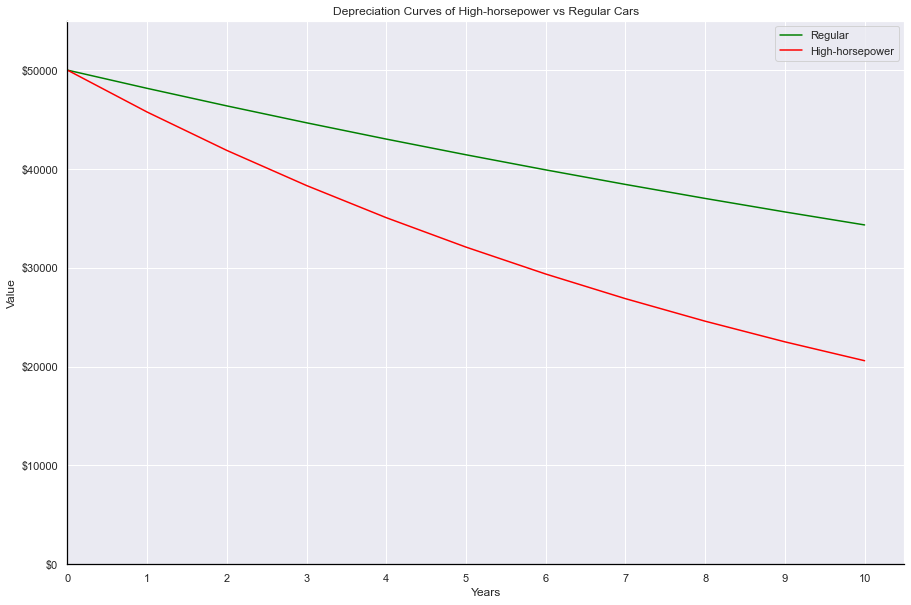

In [185]:
fig_dg, ax_dg = plt.subplots(figsize=(15, 10))
years = np.arange(0, 11, 1)
price_nonhp = 50000*(1-3.688326/100)**years
price_hp = 50000*(1-8.486219/100)**years

sns.axes_style('darkgrid')

ax_dg.plot(years, price_nonhp, color='green')
ax_dg.plot(years, price_hp, color='red')
ax_dg.legend(['Regular', 'High-horsepower'])
ax_dg.yaxis.set_major_formatter('${x:1.0f}')
ax_dg.set_title('Depreciation Curves of High-horsepower vs Regular Cars')
ax_dg.set_xlabel('Years')
ax_dg.set_ylabel('Value')
ax_dg.xaxis.set_ticks(np.arange(0, 11, 1))
ax_dg.set(xlim=[0, 10.5], ylim=[0, 55000])
ax_dg.spines['left'].set_visible(True)
ax_dg.spines['left'].set_color('black')
ax_dg.spines['bottom'].set_visible(True)
ax_dg.spines['bottom'].set_color('black')
plt.show()

This graph compares to cars, both having MSRP @ $50,000 upon initial sale, having one of them >= 250 hp and another one < 250 hp. Thus, with the calculated depreciation rates we can say that high-horsepower car _on_ _average_ will lose $10,000 more than a regular car in 6 years after initial sale, according to Carvana data. Moreover, a high-horsepower vehicle will _generally_ lose 50% of it's value after 8 years, while a regular vehicle _on_ _average_ will retain 70% of it's original value. 

# Car brands by Engine Displacement

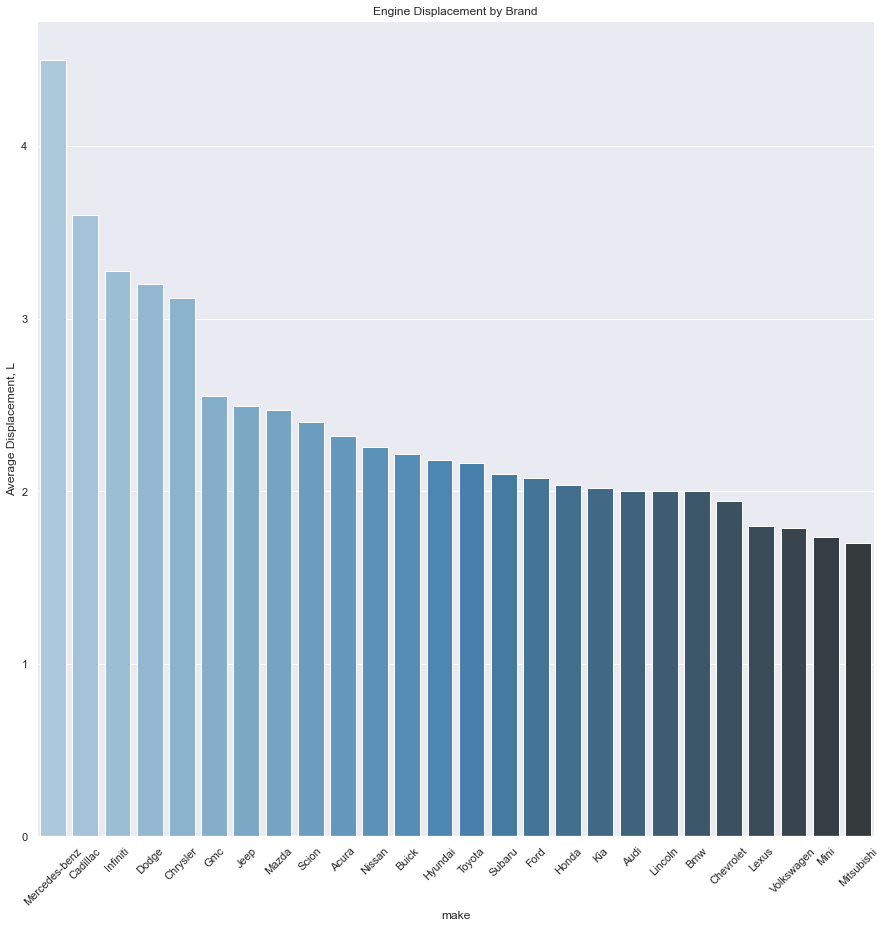

In [201]:
displacement = pd.DataFrame(carvana.groupby(['make'])['displacement'].agg('mean').sort_values(ascending=False)).transpose()

plt.figure(figsize=(15, 15))
sns.barplot(data=displacement, palette='Blues_d')
plt.xticks(rotation=45)
plt.title('Engine Displacement by Brand')
plt.ylabel('Average Displacement, L')
plt.show()

We have proven before that high-hp cars depreciate faster, and [most] of the luxury cars are _also_ high-powered cars, the exception is only BMW.
Again, big engine doesn't mean it's a muscle car: vans and pickup trucks have much bigger curb weight, therefore they need bigger engines. Mercedes is an absolute leader on this one, average displacement on their cars is the biggest.
So my assumption was almost correct, American brands go right after Mercedes.

# Most Common Car Brand and Model

Without further questions, let's find out the frequency of models and brands in this dataset:

In [205]:
carvana.make.value_counts().sort_values(ascending=False) # Nissan

Nissan           36
Ford             35
Kia              34
Chevrolet        32
Toyota           28
Hyundai          25
Honda            21
Jeep             19
Buick            19
Volkswagen       16
Dodge            10
Mazda            10
Acura             6
Subaru            6
Mitsubishi        5
Chrysler          5
Infiniti          4
Mini              3
Gmc               3
Bmw               3
Mercedes-benz     2
Audi              2
Lexus             2
Cadillac          1
Scion             1
Lincoln           1
Name: make, dtype: int64

In [207]:
carvana.model.value_counts().sort_values(ascending=False) #Honda Civic

Civic             12
Fusion            12
Corolla            9
Forte              9
Sonata             9
                  ..
A3                 1
Mirage             1
xB                 1
Veloster           1
Impala Limited     1
Name: model, Length: 120, dtype: int64

Looks like the most frequent brand is Nissan, but the most common car is Honda Civic. Let's visualize car brands by amount of cars in each:

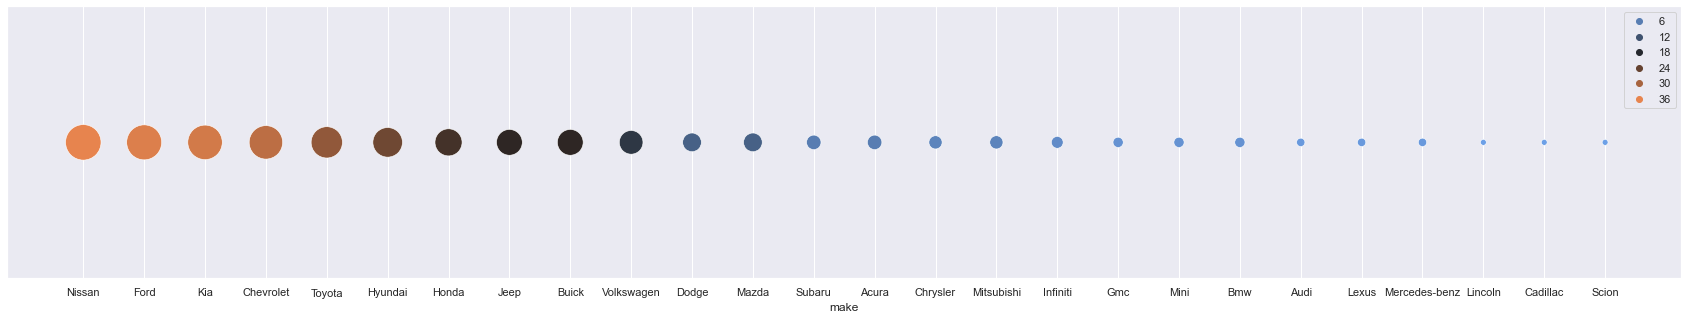

In [267]:
brands = pd.DataFrame(
    carvana.groupby(['make']).size().sort_values(ascending=False)).transpose()
#x,y = np.meshgrid(brands.columns, brands.index)
plt.figure(figsize=(30, 5))

sns.scatterplot(x=brands.columns,
                y=[0 for i in brands.columns],
                s=brands.loc[0] * 35,
                hue=carvana.groupby(['make'
                                     ]).size().sort_values(ascending=False),
                palette=sns.diverging_palette(250,
                                              30,
                                              l=65,
                                              center="dark",
                                              as_cmap=True))
plt.gca().axes.yaxis.set_visible(False) # hiding y labels
plt.show()

This plot shows amounts of cars of each brand in Carvana dataset. Brands after Hyndai have noticeably less cars than Nissan or Ford

In [240]:
brands.loc[0]

make
Nissan           36
Ford             35
Kia              34
Chevrolet        32
Toyota           28
Hyundai          25
Honda            21
Jeep             19
Buick            19
Volkswagen       16
Dodge            10
Mazda            10
Subaru            6
Acura             6
Chrysler          5
Mitsubishi        5
Infiniti          4
Gmc               3
Mini              3
Bmw               3
Audi              2
Lexus             2
Mercedes-benz     2
Lincoln           1
Cadillac          1
Scion             1
Name: 0, dtype: int64

### END

In [35]:
carvana.groupby(['year']).agg('mean').sort_values(by=['curb_weight'], ascending=False)

,id,price,mileage,zip,mpg_city,mpg_hwy,cylinders_count,horsepower,torque,doors,seats,stock_number,curb_weight,msrp,displacement
year,,,,,,,,,,,,,,,
2011,1.959361e+06,24990.000000,75392.000000,28027.000000,15.000000,23.000000,8.000000,382.000000,391.000000,4.000000,5.000000,2.001231e+09,4455.000000,94525.000000,5.500000
2012,1.978404e+06,17550.000000,73170.200000,38178.400000,22.750000,32.000000,4.400000,216.000000,213.200000,3.600000,5.200000,2.001247e+09,3529.600000,27715.000000,2.480000
2010,2.004124e+06,23990.000000,67816.000000,28027.000000,19.000000,26.000000,6.000000,NaN,NaN,2.000000,2.000000,2.001284e+09,3314.000000,37130.000000,3.700000
2014,1.987648e+06,18056.666667,56581.476190,38185.333333,22.526316,30.684211,4.631579,204.058824,195.312500,3.904762,5.047619,2.001265e+09,3211.285714,29251.809524,2.600000
2017,1.964434e+06,20772.456140,46082.175439,44218.000000,24.563636,33.163636,4.178571,171.838710,175.161290,3.964912,5.175439,2.001221e+09,3196.087719,25725.894737,1.983784
2016,1.967108e+06,20262.727273,45543.909091,42014.018182,23.648148,32.629630,4.327273,193.102564,188.076923,3.945455,5.145455,2.001230e+09,3173.454545,26760.981818,2.190698
2015,1.973266e+06,19653.636364,55059.568182,43442.795455,23.400000,32.725000,4.523810,200.000000,196.058824,3.954545,5.159091,2.001237e+09,3049.477273,30117.386364,2.578378
2019,1.961484e+06,21335.000000,35871.175000,43032.525000,26.425000,34.575000,4.025000,153.500000,149.791667,3.950000,5.100000,2.001221e+09,3010.925000,22437.875000,1.977419
2013,1.960124e+06,18927.500000,58873.312500,38198.250000,23.187500,31.250000,4.625000,199.500000,188.333333,3.750000,4.812500,2.001225e+09,2986.125000,29931.875000,2.542857


In [36]:
carvana.groupby(['year']).agg('mean').sort_values(by=['mileage'], ascending=False)

,id,price,mileage,zip,mpg_city,mpg_hwy,cylinders_count,horsepower,torque,doors,seats,stock_number,curb_weight,msrp,displacement
year,,,,,,,,,,,,,,,
2011,1.959361e+06,24990.000000,75392.000000,28027.000000,15.000000,23.000000,8.000000,382.000000,391.000000,4.000000,5.000000,2.001231e+09,4455.000000,94525.000000,5.500000
2012,1.978404e+06,17550.000000,73170.200000,38178.400000,22.750000,32.000000,4.400000,216.000000,213.200000,3.600000,5.200000,2.001247e+09,3529.600000,27715.000000,2.480000
2010,2.004124e+06,23990.000000,67816.000000,28027.000000,19.000000,26.000000,6.000000,NaN,NaN,2.000000,2.000000,2.001284e+09,3314.000000,37130.000000,3.700000
2013,1.960124e+06,18927.500000,58873.312500,38198.250000,23.187500,31.250000,4.625000,199.500000,188.333333,3.750000,4.812500,2.001225e+09,2986.125000,29931.875000,2.542857
2014,1.987648e+06,18056.666667,56581.476190,38185.333333,22.526316,30.684211,4.631579,204.058824,195.312500,3.904762,5.047619,2.001265e+09,3211.285714,29251.809524,2.600000
2015,1.973266e+06,19653.636364,55059.568182,43442.795455,23.400000,32.725000,4.523810,200.000000,196.058824,3.954545,5.159091,2.001237e+09,3049.477273,30117.386364,2.578378
2017,1.964434e+06,20772.456140,46082.175439,44218.000000,24.563636,33.163636,4.178571,171.838710,175.161290,3.964912,5.175439,2.001221e+09,3196.087719,25725.894737,1.983784
2016,1.967108e+06,20262.727273,45543.909091,42014.018182,23.648148,32.629630,4.327273,193.102564,188.076923,3.945455,5.145455,2.001230e+09,3173.454545,26760.981818,2.190698
2018,1.964318e+06,21445.882353,43003.205882,39665.000000,25.218750,33.093750,4.176471,172.428571,170.183673,3.941176,5.088235,2.001223e+09,2972.250000,24790.661765,2.105769


In [8]:
carvana.groupby('make')['price'].agg('mean').sort_values()

make
Chrysler         18390.000000
Mitsubishi       18710.000000
Scion            18990.000000
Hyundai          19246.000000
Bmw              19323.333333
Kia              19460.588235
Mini             19723.333333
Volkswagen       19865.000000
Chevrolet        20002.500000
Subaru           20023.333333
Ford             20047.142857
Nissan           20551.111111
Toyota           20882.857143
Honda            20932.857143
Buick            21305.789474
Acura            21356.666667
Jeep             21400.526316
Mazda            21770.000000
Lincoln          21990.000000
Cadillac         21990.000000
Lexus            21990.000000
Infiniti         22290.000000
Gmc              22323.333333
Dodge            23270.000000
Audi             24090.000000
Mercedes-benz    24990.000000
Name: price, dtype: float64